In [22]:
# !pip install yfinance mplfinance

In [23]:
import pandas as pd, yfinance as yf

end = pd.Timestamp.today().normalize()
start = end - pd.DateOffset(days=60)
df = yf.download("QQQ",start=start,end=end, group_by="column", interval="1d", auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [24]:
df.columns = df.columns.get_level_values(0)
df = df[["Open", "High", "Low", "Close"]]
df.columns.name = None
df.index.name = "Date"
df = df.astype(float)

In [25]:
df.index = pd.to_datetime(df.index)
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [26]:
df

,Open,High,Low,Close
Date,,,,
2025-12-11,623.017340,624.974840,616.925153,624.775085
2025-12-12,621.279581,622.737663,610.573343,612.830444
2025-12-15,617.574337,617.624260,608.535994,609.754395
2025-12-16,607.477330,612.720575,606.129031,610.962830
2025-12-17,612.271137,612.860405,599.507613,599.637390
2025-12-18,609.015348,612.141325,606.139048,608.326233
2025-12-19,611.162568,616.825255,611.082654,616.255981
2025-12-22,621.349976,621.650024,617.770020,619.210022
2025-12-23,618.200012,622.409973,617.780029,622.109985


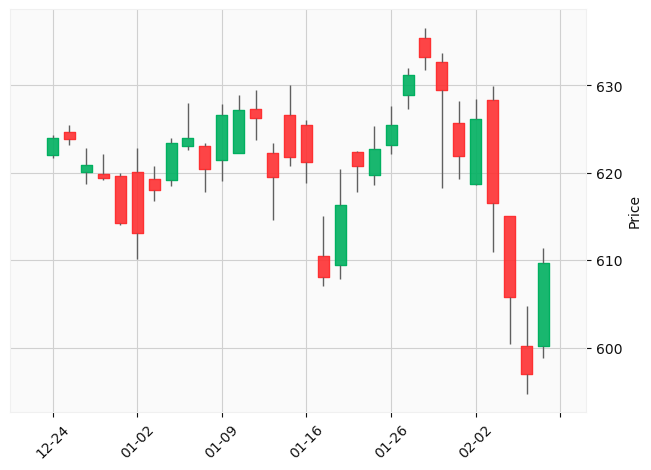

In [27]:
import mplfinance as mpf
mpf.plot(df[-30:], type="candle", volume=False, style="yahoo",datetime_format="%m-%d")

In [28]:
from pathlib import Path

out_dir = Path("")
fname = out_dir / f"QQQ_in_last_30_trading_days_{pd.Timestamp.today().strftime('%Y-%m-%d')}.png"
mpf.plot(df[-30:],type="candle",style="yahoo",figsize=(10, 5),savefig=fname,tight_layout=True,datetime_format="%m-%d")